
优衣库

不同产品的销售情况，顾客喜欢的购买方式

销售额和成本之间的关系

购买时间偏好



Store_id   门店随机id

City     城市

Channel   销售渠道  网购自提 门店购买

gender_group  客户性别 男女

age_group   客户年龄段

wkd_ind  购买发生的时间（周末，周间）

Product  产品类别

customer  客户数量

revenue  销售金额

Order      订单数量

Quant          购买产品的数量

unit_cost  成本（制作+运营）


In [23]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [4]:
# 获取数据
uniqco = pd.read_csv("./data/uniqco.csv")
uniqco.head()

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9


In [12]:
uniqco.shape

(22293, 12)

In [3]:
# 判断是否有缺失值
np.any(pd.isnull(uniqco))

False

In [6]:
uniqco['product'].head()

0    当季新品
1      运动
2      T恤
3      T恤
4      袜子
Name: product, dtype: object

In [22]:
# 各个产品的销售
uniqco_product_dis = uniqco.groupby('product')[['revenue']].count()
uniqco_product_dis

,revenue
product,
T恤,10610
当季新品,2540
毛衣,807
牛仔裤,1412
短裤,1694
袜子,2053
裙子,629
运动,976
配件,1572


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

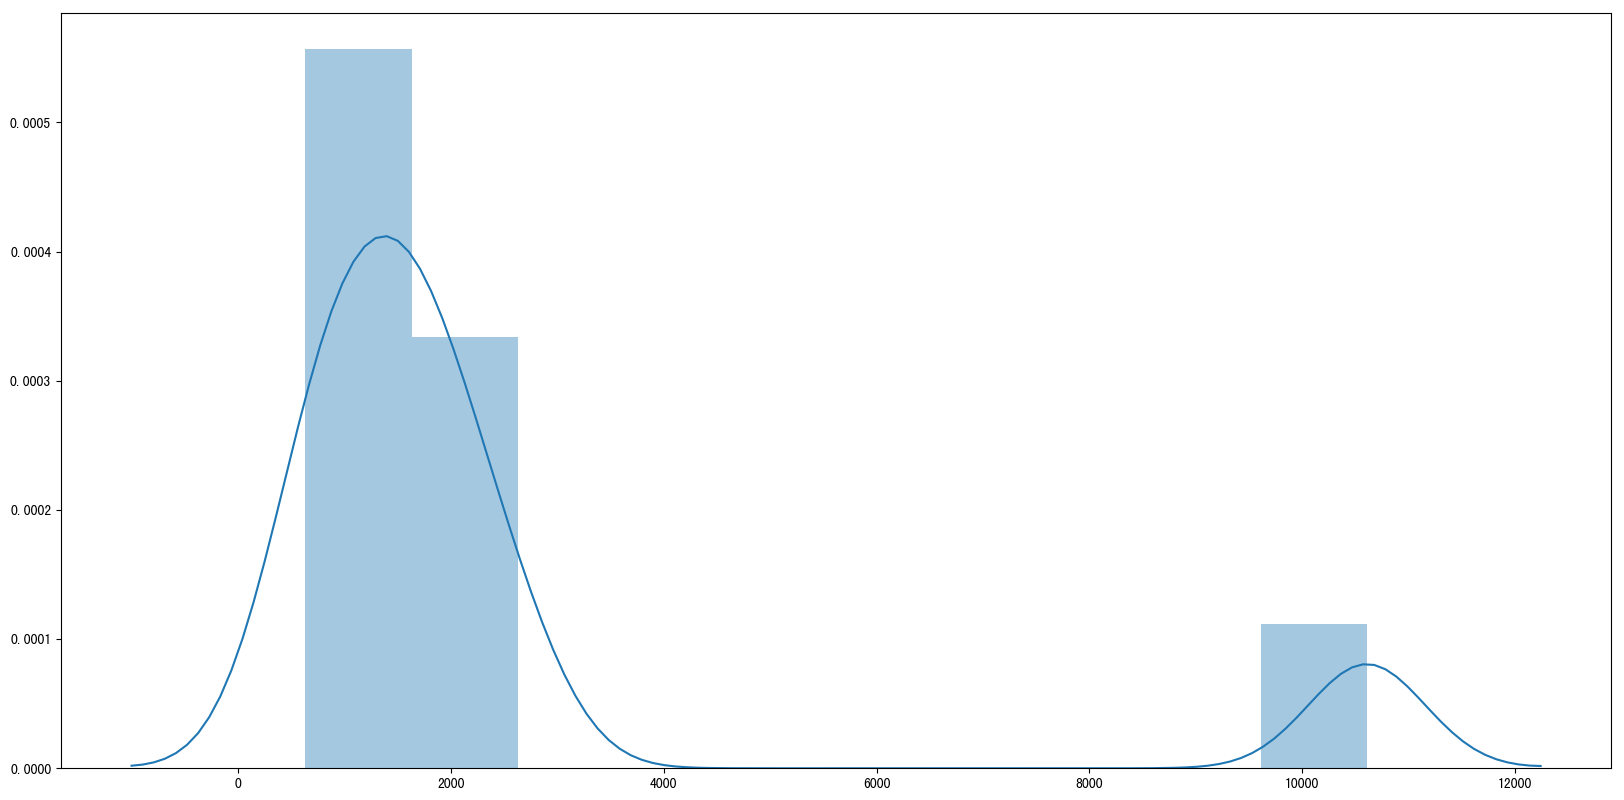

In [21]:
%matplotlib inline
plt.figure(figsize=(20,10),dpi=100)
# plt.bar(uniqco_product_dis,0.5,align='center')
sns.distplot(uniqco_product_dis)
plt.show()

In [37]:
# 对channel进行one-hot编码
channel_group = uniqco[['channel','gender_group']]

In [38]:
model_enc = OneHotEncoder()  # 建立标志转换模型对象（也称为哑编码对象）
channel_data = model_enc.fit_transform(channel_data).toarray()

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [39]:
uniqco_all = pd.concat((uniqco,pd.DataFrame(channel_data,columns=[''])),axis=1)

In [41]:
uniqco_all.head(10)

,store_id,city,channel,gender_group,age_group,wkd_ind,product,customer,revenue,order,quant,unit_cost,0,1,2,3
0,658,深圳,线下,Female,25-29,Weekday,当季新品,4,796.0,4,4,59,1.0,0.0,0.0,1.0
1,146,杭州,线下,Female,25-29,Weekday,运动,1,149.0,1,1,49,1.0,0.0,0.0,1.0
2,70,深圳,线下,Male,>=60,Weekday,T恤,2,178.0,2,2,49,1.0,0.0,0.0,1.0
3,658,深圳,线下,Female,25-29,Weekday,T恤,1,59.0,1,1,49,1.0,0.0,0.0,1.0
4,229,深圳,线下,Male,20-24,Weekend,袜子,2,65.0,2,3,9,1.0,0.0,0.0,1.0
5,28,武汉,线上,Female,35-39,Weekend,T恤,1,97.0,1,1,49,0.0,1.0,1.0,0.0
6,649,杭州,线下,Female,25-29,Weekend,短裤,1,33.0,1,1,19,1.0,0.0,0.0,1.0
7,520,杭州,线下,Male,>=60,Weekend,T恤,2,158.0,2,2,49,1.0,0.0,0.0,1.0
8,649,杭州,线下,Female,30-34,Weekend,牛仔裤,3,157.0,3,3,69,1.0,0.0,0.0,1.0
9,21,北京,线下,Female,45-49,Weekend,毛衣,1,199.0,1,1,99,1.0,0.0,0.0,1.0
